In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv(filepath_or_buffer='D:\Documentos\Documentos\DataAnalysis\ebac\Python\Modulo23\supermarket_sales.csv')
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
894,811-35-1094,B,Mandalay,Member,Male,Electronic accessories,50.45,6,15.135,317.835,2/6/2019,15:16,Credit card,302.70,4.761905,15.135,8.9
476,485-30-8700,A,Yangon,Normal,Female,Sports and travel,33.26,5,8.315,174.615,3/18/2019,16:10,Credit card,166.30,4.761905,8.315,4.2
793,263-12-5321,A,Yangon,Member,Male,Electronic accessories,92.60,7,32.410,680.610,2/27/2019,12:52,Credit card,648.20,4.761905,32.410,9.3
181,434-83-9547,C,Naypyitaw,Member,Male,Food and beverages,38.47,8,15.388,323.148,1/23/2019,11:51,Cash,307.76,4.761905,15.388,7.7
490,686-41-0932,B,Mandalay,Normal,Female,Fashion accessories,34.70,2,3.470,72.870,3/13/2019,19:48,Ewallet,69.40,4.761905,3.470,8.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
for column in  df.columns:
    data_type = df[column].dtype

    if data_type == 'object':
        len_ = df[column].str.len().max()
    
    else :
        len_ = df[column].max()
    
    print(f'{column} - {data_type} - {len_}')
    

Invoice ID - object - 11
Branch - object - 1
City - object - 9
Customer type - object - 6
Gender - object - 6
Product line - object - 22
Unit price - float64 - 99.96
Quantity - int64 - 10
Tax 5% - float64 - 49.65
Total - float64 - 1042.65
Date - object - 9
Time - object - 5
Payment - object - 11
cogs - float64 - 993.0
gross margin percentage - float64 - 4.761904762
gross income - float64 - 49.65
Rating - float64 - 10.0


In [5]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [16]:
df['Date'].astype(dtype=np.datetime64).dt.month.unique()

array([1, 3, 2], dtype=int64)

In [19]:
df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [125]:
df.sort_values(by='Date', inplace=True)
df['Date'] = df['Date'].astype(dtype=np.datetime64).dt.date
df['Purchase Month'] = df['Date'].apply(lambda x: x.strftime('%B-%Y')) 

pd.pivot_table(data=df, index='Purchase Month',  columns='Customer type', values='Invoice ID', aggfunc='count', margins=True)

Customer type,Member,Normal,All
Purchase Month,,,
February-2019,163,140,303
January-2019,172,180,352
March-2019,166,179,345
All,501,499,1000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


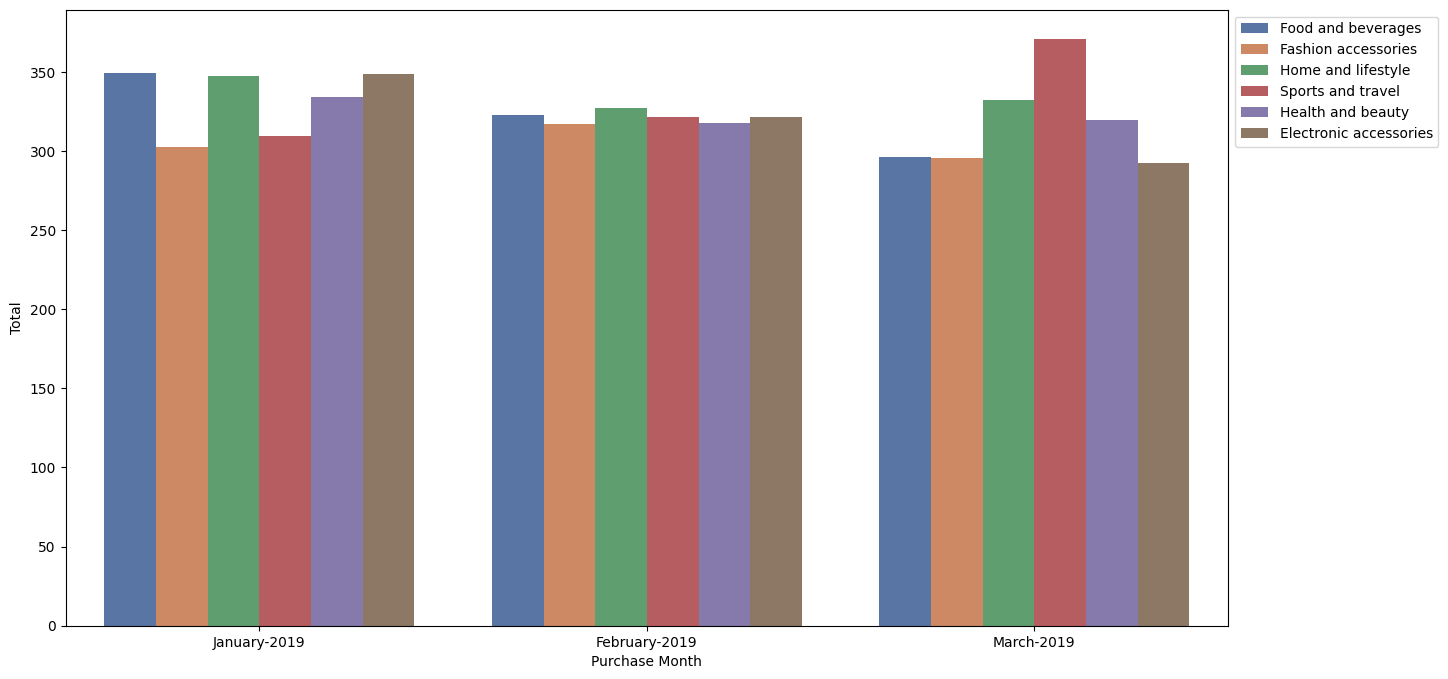

In [100]:
# Product lines más vendidos por mes
plt.figure(figsize=(15,8))
plt.legend()
sns.barplot(data=df, x='Purchase Month', y='Total', hue='Product line', errorbar=None, palette='deep')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))



Text(0.5, 1.0, 'Total de Ventas por Tipo de Producto')

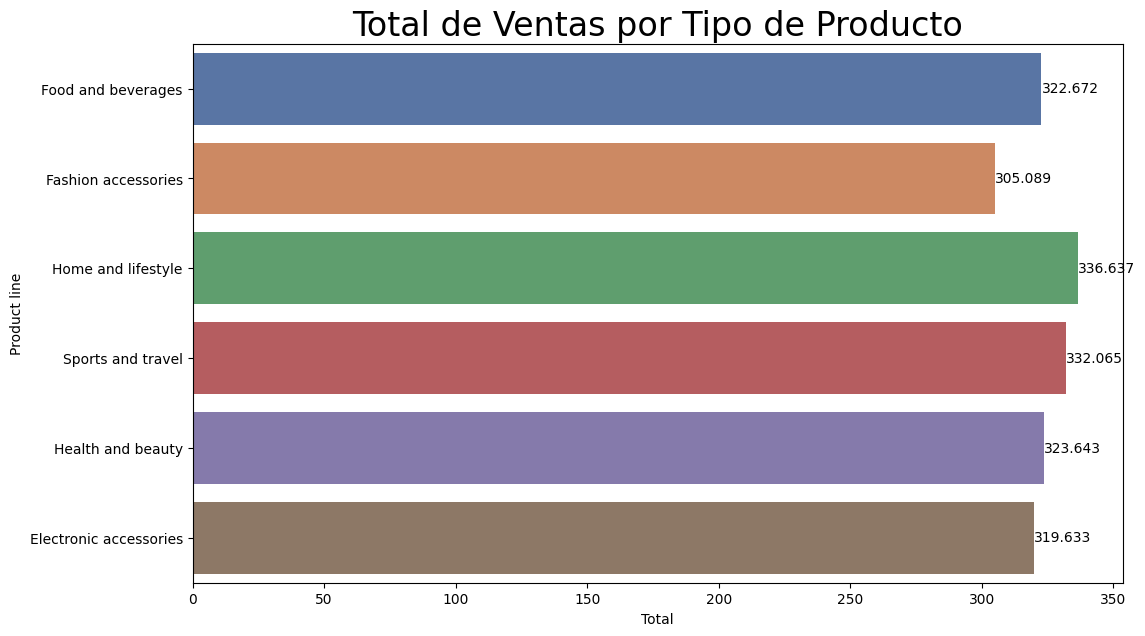

In [134]:
# Ranking de items vendidos por venta total
plt.figure(figsize=(12,7))
ax = sns.barplot(data=df, x='Total', y='Product line', errorbar=None, palette='deep')
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Total de Ventas por Tipo de Producto', fontsize=24)


[Text(0, 0, '170'),
 Text(0, 0, '178'),
 Text(0, 0, '174'),
 Text(0, 0, '152'),
 Text(0, 0, '160'),
 Text(0, 0, '166')]

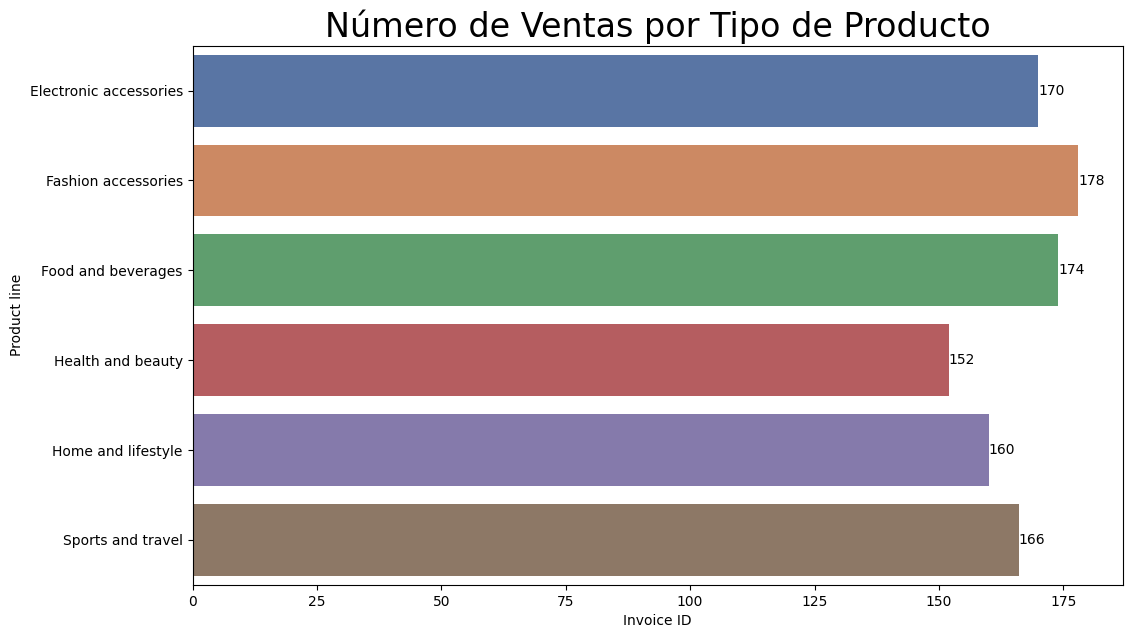

In [133]:
# Ranking de product line por número de ventas
plt.figure(figsize=(12,7))
pivot = pd.pivot_table(data=df, index='Product line', values='Invoice ID', aggfunc='count').reset_index()

ax = sns.barplot(data=pivot, x='Invoice ID', y='Product line', palette='deep')
plt.title('Número de Ventas por Tipo de Producto', fontsize=24)
ax.bar_label(ax.containers[0], fontsize=10)
